# Esercizio 2

L’ossigeno consumato da una persona che cammina è funzione della sua velocità. La seguente tabella riporta il volume di ossigeno 
consumato a varie velocità di cammino. 
- Ipotizzando una relazione lineare, scrivere l’equazione della retta di regressione. 
- Si testi la significatività della regressione usando α = 0.05.

In [1]:
import numpy as np
from scipy.stats import f, norm, probplot, t
import matplotlib.pyplot as plt

x_bar: 5.0
y_bar: 28.06
Sig2_x: 10.00
Sig_xy: 14.71
b0: 20.71
b1: 1.47


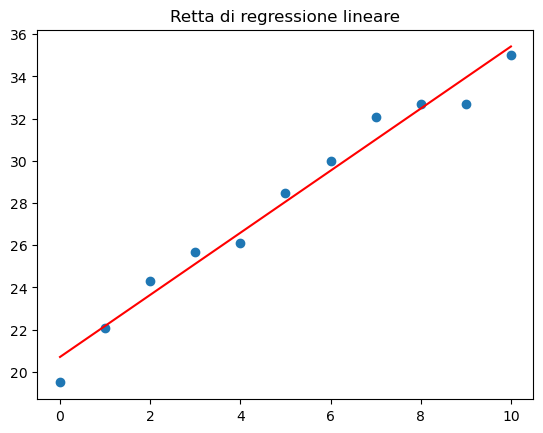

In [2]:
x = np.arange(0, 11) # da 0 a 10
y = np.array([19.5, 22.1, 24.3, 25.7, 26.1, 28.5, 30.0, 32.1, 32.7, 32.7, 35.0])
alpha = 0.05
n = x.size

x_bar = np.mean(x)
print(f'x_bar: {round(x_bar, 2)}')

y_bar = np.mean(y)
print(f'y_bar: {round(y_bar, 2)}')

sig_x = np.sqrt(np.sum((x-x_bar)**2)/n)
sig2_x = sig_x**2
print(f'Sig2_x: {sig2_x:.2f}')

sig_xy = sum((x-x_bar)*(y-y_bar))/n
print(f'Sig_xy: {sig_xy:.2f}')

b0 = y_bar - sig_xy/(sig2_x) * x_bar
print(f'b0: {b0:.2f}')

b1 = sig_xy/(sig2_x)
print(f'b1: {b1:.2f}')

Y = b0 + b1*x
plt.scatter(x, y)
plt.plot(x, Y, 'red')
plt.title("Retta di regressione lineare")
plt.show()

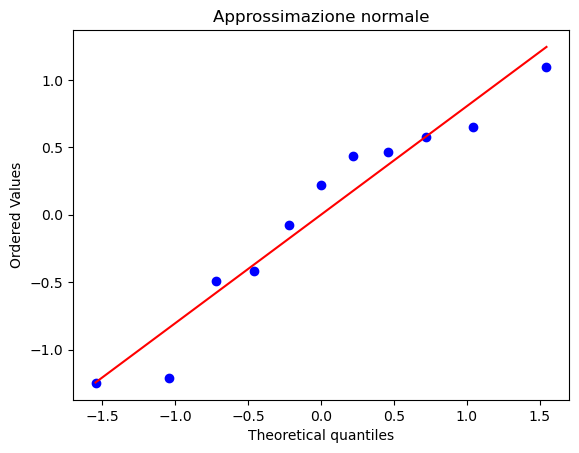

In [3]:
alpha = 0.05
y_hat = b0+b1*x
r = y-y_hat
s2 = np.sum(r**2)/(n-2)
s = np.sqrt(s2)

_, ax = plt.subplots(1,1)
probplot(r, dist=norm, plot=ax) # se i residui si adattano alla normale è un buon modello
plt.title("Approssimazione normale")
plt.show()

In [4]:
# Calcolo gli intervalli di confidenza per Beta0 e Beta1

T = norm.ppf(1-alpha/2, n-2)

A = b0-s*np.sqrt((1/n)+(x_bar**2/n*sig2_x*T))
B = b0+s*np.sqrt((1/n)+(x_bar**2/n*sig2_x*T))
print(f'Intervallo di confidenza per Beta_0 : [{A:.3f} - {B:.3f}] --> b0: {b0:.3f}')

A = b1-(s/sig_x*np.sqrt(n)*T)
B = b1+(s/sig_x*np.sqrt(n)*T)
print(f'Intervallo di confidenza per Beta_1 : [{A:.3f} - {B:.3f}] --> b1: {b1:.3f}')

Intervallo di confidenza per Beta_0 : [7.980 - 33.438] --> b0: 20.709
Intervallo di confidenza per Beta_1 : [-7.798 - 10.740] --> b1: 1.471


In [5]:
sig2_r = np.sum(r**2)/n
print(f'sig2_r: {sig2_r:.2f}')

sig2_f = sig_xy**2/sig_x**2
print(f'sig2_f: {sig2_f:.2f}')

sig2_y = sig2_f + sig2_r
print(f'sig2_y: {sig2_y:.2f}')

R2 = 1-sig2_r/sig2_y
print(f'\nCoefficiente di determinazione: {R2:.2f}')

bound = 0.20
if 1-R2 >= bound:
    print("Questo non è un buon modello")
else:
    print("Questo è un buon modello")

sig2_r: 0.53
sig2_f: 21.64
sig2_y: 22.17

Coefficiente di determinazione: 0.98
Questo è un buon modello


In [6]:
# Test di indipendenza ed intervalli di confidenza
# H0 : b1 = 0
# H1 : b1 != 0

T = norm.ppf(1-alpha/2, n-2)
T1 = np.abs(np.sqrt(n)*b1/s*sig_x)

cond = T1 >= T
print(f"Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del {int(alpha*100)}%" if cond else "Non ho abbastanza elementi per rigettare l'ipotesi nulla")

Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del 5%


# Regressione lineare multipla

Stimatori per b0 e b1: [20.709  1.471]



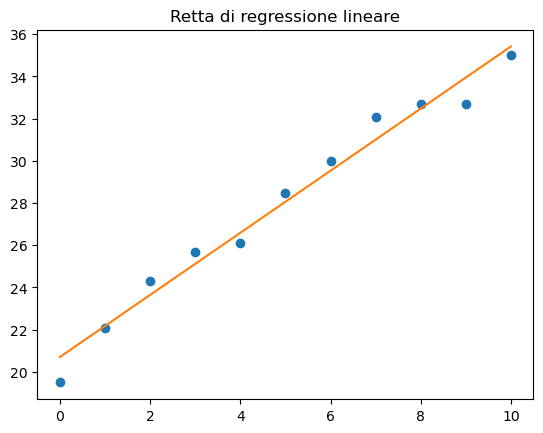

In [7]:
k = 2

x1 = np.ones(n)
x2 = x

X = np.zeros((n, k))
X[:,0] = x1
X[:,1] = x2

XX = np.linalg.pinv(X)

b = np.dot(XX, y)
y_hat = np.dot(X, b)

print(f'Stimatori per b0 e b1: {np.round(b, 3)}\n')

Y = b[0]*x1 + b[1]*x2

plt.title("Retta di regressione lineare")
plt.plot(x, y, 'o')
plt.plot(x, Y)
plt.show()

In [8]:
# Coefficiente di determinazione

R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
print(f'Coefficiente di determinazione: {R2:.2f}')

bound = 0.20
if 1-R2 >= bound:
    print("Questo non è un buon modello")
else:
    print("Questo è un buon modello")

Coefficiente di determinazione: 0.98
Questo è un buon modello


In [9]:
# Test di indipendenza ed intervalli di confidenza
# H0 : b1 = 0
# H1 : b1 != 0

r = y-y_hat
s2 = np.sum(r**2)/(n-k)
s = np.sqrt(s2)

M = np.linalg.inv(np.dot(X.T, X))

T = norm.ppf(1-alpha/2, n-k)
T1 = np.abs(b[1]/s*np.sqrt(M[1][1]))

cond = T1 >= T
print(f"Rigetto l'ipotesi nulla, i dati sono dipendenti con una significatività del {int(alpha*100)}%" if cond else "Non ho abbastanza elementi per rigettare l'ipotesi nulla")

for i in range(k):
    A = b[i]-s*np.sqrt(M[i][i]*T)
    B = b[i]+s*np.sqrt(M[i][i]*T)
    print(f'Intervallo di confidenza per Beta_{i} : [{A:.3f} - {B:.3f}] --> b{i}: {b[i]:.3f}')

Non ho abbastanza elementi per rigettare l'ipotesi nulla
Intervallo di confidenza per Beta_0 : [19.203 - 22.215] --> b0: 20.709
Intervallo di confidenza per Beta_1 : [1.216 - 1.725] --> b1: 1.471


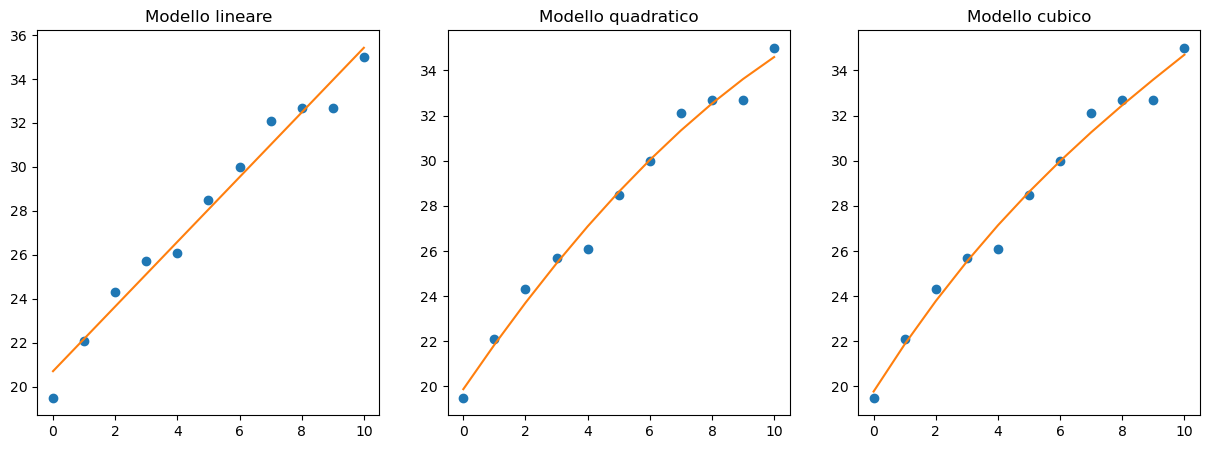

In [10]:
# Si prova un modello quadratico ed uno cubico

# Modello lineare

k = 3

x1 = np.ones(n)
x2 = x
x3 = x**2

X = np.ones((n, k))
X[:, 0] = x1
X[:, 1] = x2
X[:, 2] = x3

XX = np.linalg.pinv(X)

b = np.dot(XX, y)

Y2 = b[0]*x1 + b[1]*x2 + b[2]*x3

# Modello cubico

k = 4

x1 = np.ones(n)
x2 = x
x3 = x**2
x4 = x**3

X = np.ones((n, k))
X[:, 0] = x1
X[:, 1] = x2
X[:, 2] = x3
X[:, 3] = x4

XX = np.linalg.pinv(X)

b = np.dot(XX, y)

Y3 = b[0]*x1 + b[1]*x2 + b[2]*x3 + b[3]*x4

# Confronto tra i due modelli
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5)) # 1 riga e due colonne

ax1.set_title("Modello lineare")
ax1.plot(x, y, 'o')
ax1.plot(x, Y)

ax2.set_title("Modello quadratico")
ax2.plot(x, y, 'o')
ax2.plot(x, Y2)

ax3.set_title("Modello cubico")
ax3.plot(x, y, 'o')
ax3.plot(x, Y3)

plt.show()